In [5]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
# Step 2: Load the dataset
file_path = "/content/sales_forecasting_historical_dataset.csv"
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()

,Date,Store_ID,Product_ID,Category,Units_Sold,Unit_Price,Promotion,Season,Total_Sales
0,2021-01-01,7,1007,Home Appliances,90,320.36,Yes,Winter,28832.40
1,2021-01-02,20,1018,Clothing,144,265.51,Yes,Summer,38233.44
2,2021-01-03,15,1027,Groceries,69,234.27,No,Winter,16164.63
3,2021-01-04,11,1034,Electronics,61,121.15,No,Festive,7390.15
4,2021-01-05,8,1027,Electronics,138,155.08,No,Summer,21401.04


In [7]:
# Step 3: Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1000 non-null   object 
 1   Store_ID     1000 non-null   int64  
 2   Product_ID   1000 non-null   int64  
 3   Category     1000 non-null   object 
 4   Units_Sold   1000 non-null   int64  
 5   Unit_Price   1000 non-null   float64
 6   Promotion    1000 non-null   object 
 7   Season       1000 non-null   object 
 8   Total_Sales  1000 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [8]:
# Step 4: Check missing values
df.isnull().sum()


,0
Date,0
Store_ID,0
Product_ID,0
Category,0
Units_Sold,0
Unit_Price,0
Promotion,0
Season,0
Total_Sales,0


In [9]:
# Step 5: Fill missing values (if any)
df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-1110399072.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
# Step 6: Select features and target
# NOTE: Change column names if your dataset uses different ones

# Example assumption:
# 'Date' -> time column
# 'Sales' -> target column

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

X = df[['Year', 'Month', 'Day']]
y = df['Total_Sales']



In [11]:
# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
# Step 8: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Step 9: Predictions
y_pred = model.predict(X_test)

In [14]:
# Step 10: Model evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 19232.043073812987
MSE: 515529545.78951335
RMSE: 22705.275725908137
R2 Score: -0.002261563245711473


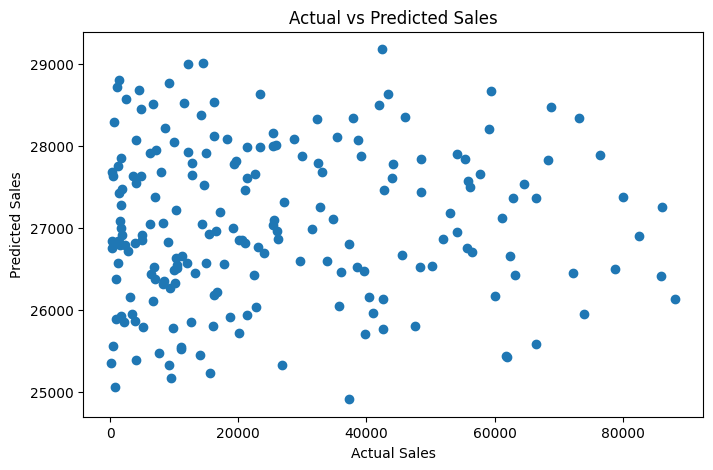

In [15]:
# Step 11: Plot Actual vs Predicted Sales
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()